In [1]:
import pandas as pd

## 1. Thu nhập dữ liệu

In [2]:
mall_customers_df=pd.read_csv("Mall_Customers.csv")

In [3]:
mall_customers_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 2. Khám phá dữ liệu 

### Dữ liệu có bao nhiều cột, bao nhiêu dòng ?

In [4]:
num_rows, num_cols = mall_customers_df.shape
print(f'Rows: {num_rows} \nCols: {num_cols}')

Rows: 200 
Cols: 5


### Kiểm tra trùng lặp

In [5]:
have_duplicated_rows = mall_customers_df.duplicated().any()
have_duplicated_rows

False

### Mỗi cột có ý nghĩa gì?

**CustomerID**: Unique ID assigned to the customer

**Gender**: Gender of the customer

**Age**: Age of the customer

**Annual Income**: Annual Income of the customer (k$)

**Spending**: Score assigned by the mall based on customer behavior and spending nature

### Chi tiết từng cột

In [6]:
mall_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
mall_customers_df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

Dữ liệu sạch, không có giá trị rỗng cũng như phân loại đầy đủ. Ngoại trừ cột Gender ra thì các cột còn lại đều là số.

### Thống kê cơ bản từng biến 

In [8]:
mall_customers_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Nhận xét:
- Bởi vì ta có tổng cộng 200 khách hàng được ghi nhận mà CustomerID lại nằm trong khoảng từ 1-200 tức mỗi khách hàng có ID khác nhau nên cột này không có nhiều ý nghĩa phân cụm cũng như trực quan.
- ...

### Tiền xử lý

Ta sẽ bỏ cột CustomerID, ngoài ra ta cũng có thể tiền xử lý cột Gender. Tuy nhiên, việc này không đem lại nhiều lợi ý vì dù Gender có đổi sang số thì lúc này chỉ có hai giá trị. Khi trực quan ra biểu đồ, các điểm dữ liệu sẽ tập trung thành một hàng ngang, ảnh hưởng đến mô hình cũng như phân cụm dữ liệu. Ta sẽ encode chúng khi muốn sử dụng các mô hình phân lớp hoặc hồi quy khác.

In [9]:
mall_customers_df = mall_customers_df.drop("CustomerID",axis=1)

In [10]:
mall_customers_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### Trực quan hóa dữ liệu

#### Trần Quốc Việt

#### Trương Chí Toàn

In [16]:
import seaborn as sns; sns.set_theme(color_codes=True)
import matplotlib.pyplot as plt

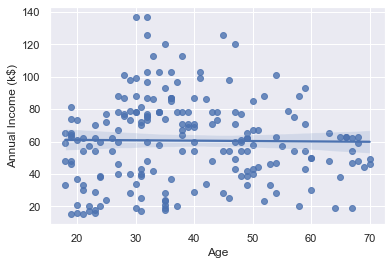

In [24]:
sns.regplot(x="Age", y="Annual Income (k$)", data=mall_customers_df)
plt.show()

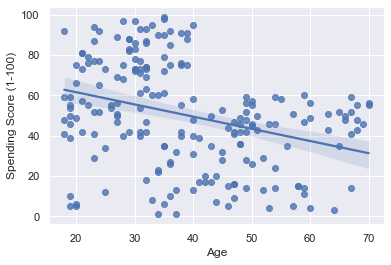

In [21]:
sns.regplot(x="Age", y="Spending Score (1-100)", data=mall_customers_df)
plt.show()

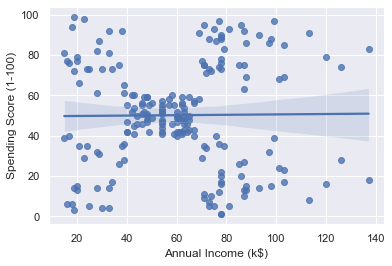

In [23]:
sns.regplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=mall_customers_df)
plt.show()

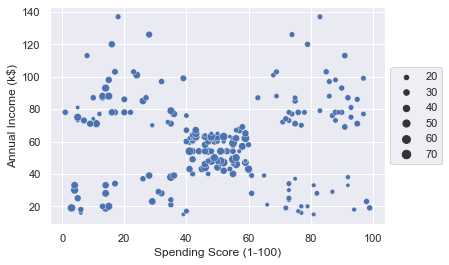

<Figure size 6000x4000 with 0 Axes>

In [37]:
ax = sns.scatterplot(data=mall_customers_df, x="Spending Score (1-100)", y="Annual Income (k$)",size='Age')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(dpi=1000)
plt.show()

Qua biểu đồ trên, ta dự đoán dữ liệu được chia ra thành 5 cụm:
- Cụm ở giữa rõ ràng nhất khi mật độ dày đặc và đa dạng về độ tuổi
- 4 cụm xung quanh ở 4 hướng thì có mật độ rải rác và có phân chia rõ về độ tuổi



#### Nhận xét

## Clustering

#### Lê Minh Trí